# Pytorch scalar regression example 

* Author: J. Hickman
* scalar linear regression  m(x,p)=p[0]+p[1]*x

#### Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


Bad key text.latex.preview in file C:\Users\Lovecraft.Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Lovecraft.Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Lovecraft.Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

#### Generate data

In [2]:
# GENERATE DATA TO FIT
x=np.random.uniform(-3,10,100)
p_exact=[1.5,2.5]
y = (p_exact[0]+p_exact[1]*x) + 2.5*np.random.uniform(-1,1,size=len(x))
print("EXACT PARAMETERS:",p_exact)

EXACT PARAMETERS: [1.5, 2.5]


#### Neural network model

nn.Module is the base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes:

An __init__() call to the parent class must be made before assignment on the child.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html



In [3]:
# GET CPU OR GPU DEVICE FOR TRAINING.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"USING {device} DEVICE")

# # Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        #__init__() call to the parent class
        super(NeuralNetwork, self).__init__()
        #define linear model
        self.linear_model = torch.nn.Sequential(
            torch.nn.Linear(1, 1),
        )

    #FORWARD PASS (EVALUATION OF MODEL)
    def forward(self, x):
        out = self.linear_model(x)
        return out

#INITIALIZE MODEL 
model = NeuralNetwork().to(device)
print(model)


USING cpu DEVICE
NeuralNetwork(
  (linear_model): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)


In [4]:
#CHECK PARAMETERS (NOTICE HOW THEY WERE AUTOMATICALLY RANDOMIZED)
for param in model.parameters():
    print(param)
    print(param.shape)
    print(param.requires_grad)

Parameter containing:
tensor([[-0.5876]], requires_grad=True)
torch.Size([1, 1])
True
Parameter containing:
tensor([-0.7949], requires_grad=True)
torch.Size([1])
True


In [5]:
# CONVERT TO TORCH TENSOR AND EVALUATE MODEL AS A TEST
x=torch.tensor(x).view(x.shape[0],1)
y=torch.tensor(y).view(x.shape[0],1)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

print("X-VALIDATION:",x_val.shape,x_val.dtype)
print("Y-VALIDATION:",y_val.shape,y_val.dtype)
print("X-TRAIN:",x_train.shape,x_train.dtype)
print("Y-TRAIN:",y_train.shape,y_train.dtype)
y_pred = model(x_train.float())
print("PREDICTION:",y_pred.shape,y_pred.dtype)


X-VALIDATION: torch.Size([20, 1]) torch.float64
Y-VALIDATION: torch.Size([20, 1]) torch.float64
X-TRAIN: torch.Size([80, 1]) torch.float64
Y-TRAIN: torch.Size([80, 1]) torch.float64
PREDICTION: torch.Size([80, 1]) torch.float32


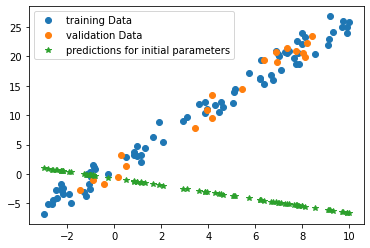

In [7]:
# PLOT THE FIGURE
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o', label='training Data')
ax.plot(x_val, y_val, 'o', label='validation Data')
ax.plot(x_train, y_pred.detach().numpy(), '*', label='predictions for initial parameters')
ax.legend()
plt.show()

#### Initialize 

In [8]:

#INITIALIZE ARRAYS TO SAVE HISTORY
epoch_array=[]
val_loss_history=[]
train_loss_history=[]

#INITIALIZE LOSS FUNCTION AND OPTIMIZER
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


#### Utility functions 

In [9]:
i_print=True

def train(x_train,y_train, model, loss_fn, optimizer):
    #TELL MODEL IT SHOULD BE TRAINING
    model.train()

    #BATCH IMPLEMENTATION 
    X, y = x_train.to(device).float(), y_train.to(device).float()

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if t % 5 == 0:
    loss = loss.item() 
    train_loss_history.append(loss)

    if(i_print):
        print(f"loss: {loss:>7f}")

In [10]:
def validate(x_val,y_val, model, loss_fn):
    #TELL MODEL IT SHOULD BE EVALUATING
    model.eval()
    X, y = x_val.to(device).float(), y_val.to(device).float()
    pred = model(X)
    val_loss = loss_fn(pred, y).item()
    val_loss_history.append(val_loss)
    if(i_print):
        print(f"Test Error: {val_loss:>8f}")

    #FOR CLASSIFICATION 
    # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    # correct /= y.shape[0]
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#### Training loop

In [11]:
epochs = 300

for t in range(epochs):
    epoch_array.append(t)
    if t%50==0:
        i_print=True
        print(f"-------------------------------\nEpoch {t}")

    else: 
        i_print=False

    train(x_train,y_train, model, loss_fn, optimizer)
    validate(x_val,y_val, model, loss_fn)
print("Done!")

-------------------------------
Epoch 0
loss: 329.252594
Test Error: 322.835754
-------------------------------
Epoch 50
loss: 4.956655
Test Error: 3.943248
-------------------------------
Epoch 100
loss: 4.024057
Test Error: 2.363604
-------------------------------
Epoch 150
loss: 3.790490
Test Error: 2.258068
-------------------------------
Epoch 200
loss: 3.583926
Test Error: 2.203113
-------------------------------
Epoch 250
loss: 3.400152
Test Error: 2.160176
Done!


#### Plot results

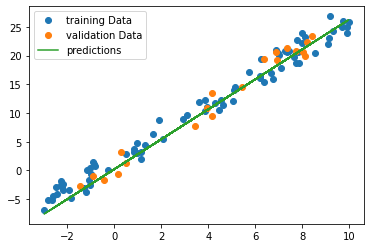

In [12]:
# PLOT THE FIGURE
y_pred = model(x_train.float())

# PLOT THE FIGURE
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o', label='training Data')
ax.plot(x_val, y_val, 'o', label='validation Data')
ax.plot(x_train, y_pred.detach().numpy(), '-', label='predictions')
ax.legend()
plt.show()

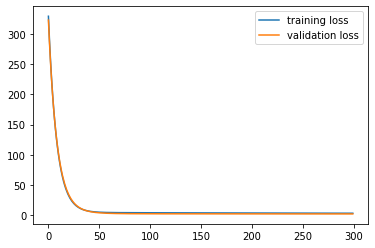

In [13]:
# PLOT THE FIGURE
y_pred = model(x_train.float())

fig, ax = plt.subplots()
ax.plot(epoch_array, train_loss_history, '-', label='training loss')
ax.plot(epoch_array, val_loss_history, '-', label='validation loss')
ax.legend()
plt.show()